# One layer decomposition experiments visualisation

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

In [20]:
folder = '/media/pavel/storage/decomposition_results/51_decompositions_results/'
# folder = '/media/pavel/storage/decomposition_results/51_decompositions_results_save/'

In [21]:
dfs = {}
for err_result in os.listdir(folder):
    if err_result.startswith('arch'):
        
        err = float(err_result.split('__')[-1])
        dfs[err] = pd.read_csv(os.path.join(folder, err_result, 'log.tsv'), sep='\t').dropna()

In [22]:
dfs[0.301]

layer  epoch       acc1       acc5
51     51    0.0  72.584000  91.127998
52     51    1.0  74.821999  92.348000
53     51    2.0  75.821999  92.689995
54     51    3.0  76.075996  92.834000
55     51    4.0  76.164001  93.049995

In [23]:
def extract_one_layer_row(df, layer_no):
    df = df[df['layer'] == layer_no].sort_values('epoch')
    if len(df) == 0:
        print('df is empty')
        return
    epochs = df['epoch'].values.astype(int)
    acc1 = df['acc1'].values.astype(float)
    acc5 = df['acc5'].values.astype(float)
    return epochs, acc1, acc5

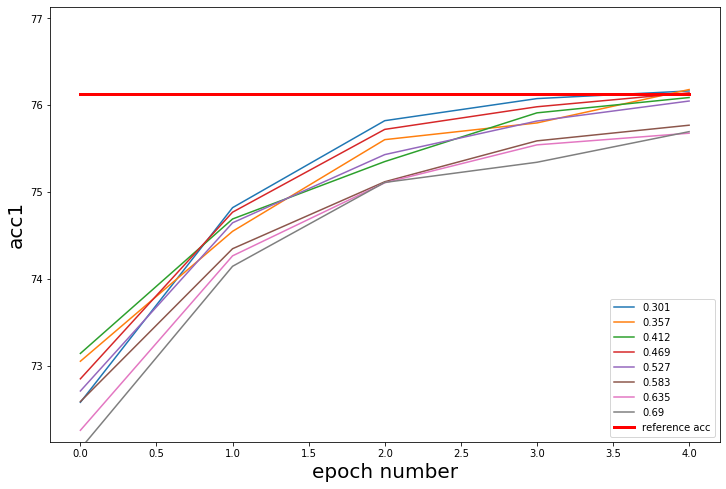

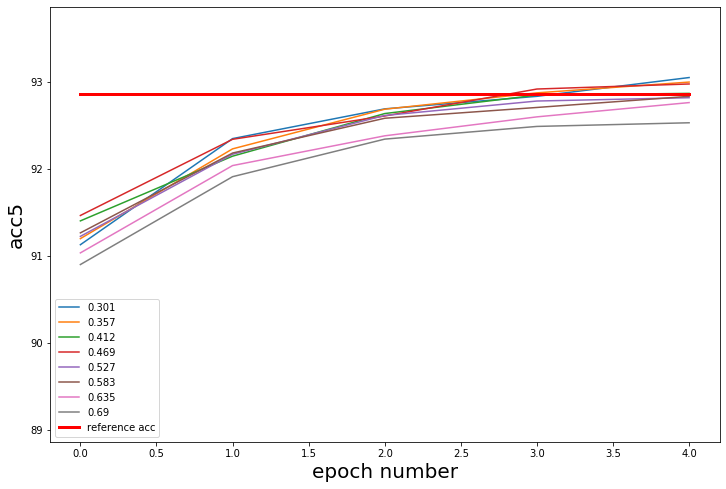

In [24]:
acc1_ref, acc5_ref = 76.130, 92.862

for err, df in dfs.items():
    epochs, acc1, acc5 = extract_one_layer_row(df, 51)
    plt.plot(epochs, acc1, label=f'{err}')
plt.xlabel('epoch number', fontsize=20)
plt.ylabel('acc1', fontsize=20)
plt.plot([epochs[0], epochs[-1]], [acc1_ref]*2, linewidth=3, color='r', label='reference acc')
plt.ylim([acc1_ref - 4, acc1_ref + 1])
plt.legend()
plt.show()

for err, df in dfs.items():
    epochs, acc1, acc5 = extract_one_layer_row(df, 51)
    plt.plot(epochs, acc5, label=f'{err}')
plt.xlabel('epoch number', fontsize=20)
plt.ylabel('acc5', fontsize=20)
plt.plot([epochs[0], epochs[-1]], [acc5_ref]*2, linewidth=3, color='r', label='reference acc')
plt.ylim([acc5_ref - 4, acc5_ref + 1])
plt.legend()
plt.show()